In [125]:
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
df = pd.read_csv("weather_data.csv", names=["timestamp", "temperature", "humidity"], parse_dates=["timestamp"])
df.tail()

,timestamp,temperature,humidity
886,2025-09-22 14:03:27,31.1,87.0
887,2025-09-22 14:03:32,31.3,87.0
888,2025-09-22 14:06:57,31.3,87.0
889,2025-09-22 14:07:02,31.2,87.0
890,2025-09-22 14:07:07,31.5,87.0


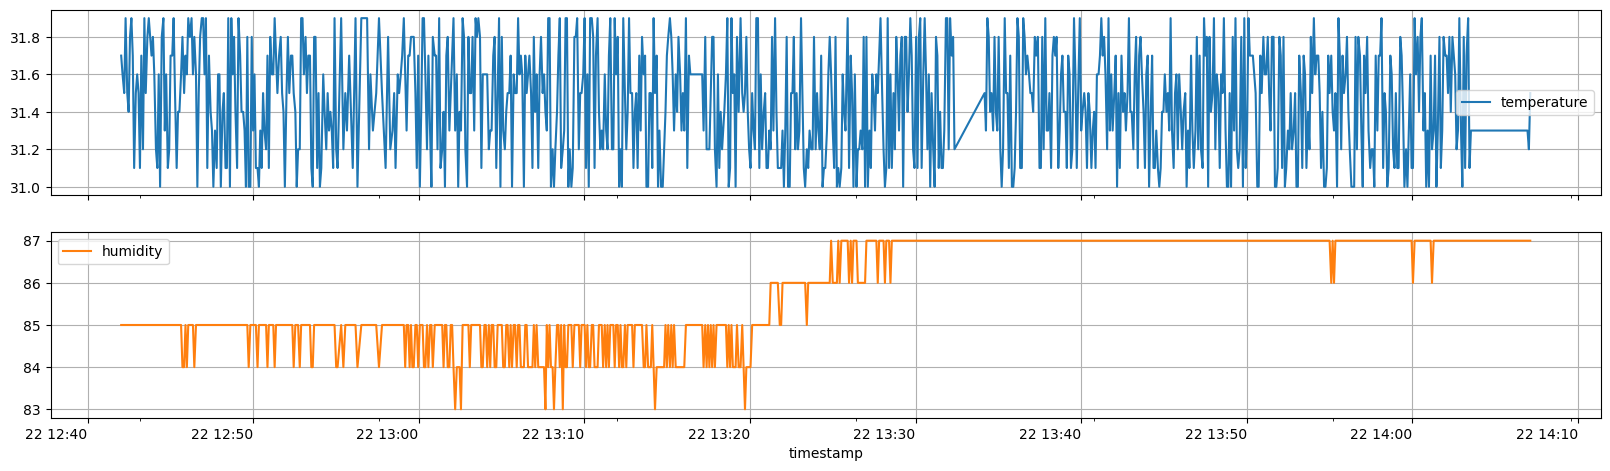

In [127]:
df.plot(
    x="timestamp",
    y=["temperature", "humidity"],
    subplots=True,
    figsize=(20, 6),
    grid=True,
)
plt.xticks(rotation=0)
plt.show()

In [128]:
df.tail(1) # Display the most recent data point

,timestamp,temperature,humidity
890,2025-09-22 14:07:07,31.5,87.0


In [129]:
df.describe()

,timestamp,temperature,humidity
count,891,891.000000,891.000000
mean,2025-09-22 13:23:22.870931712,31.453311,85.830527
min,2025-09-22 12:42:02,31.000000,83.000000
25%,2025-09-22 13:03:12.500000,31.200000,85.000000
50%,2025-09-22 13:23:20,31.500000,86.000000
75%,2025-09-22 13:44:24.500000,31.700000,87.000000
max,2025-09-22 14:07:07,31.900000,87.000000
std,NaN,0.292755,1.173399


In [130]:
temp_mean = df["temperature"].mean()
temp_std = df["temperature"].std()
humidity_mean = df["humidity"].mean()
humidity_std = df["humidity"].std()

df["temp_anomaly"] = (df["temperature"] > temp_mean + 2*temp_std) | (df["temperature"] < temp_mean - 2*temp_std)
df["humidity_anomaly"] = (df["humidity"] > humidity_mean + 2*humidity_std) | (df["humidity"] < humidity_mean - 2*humidity_std)

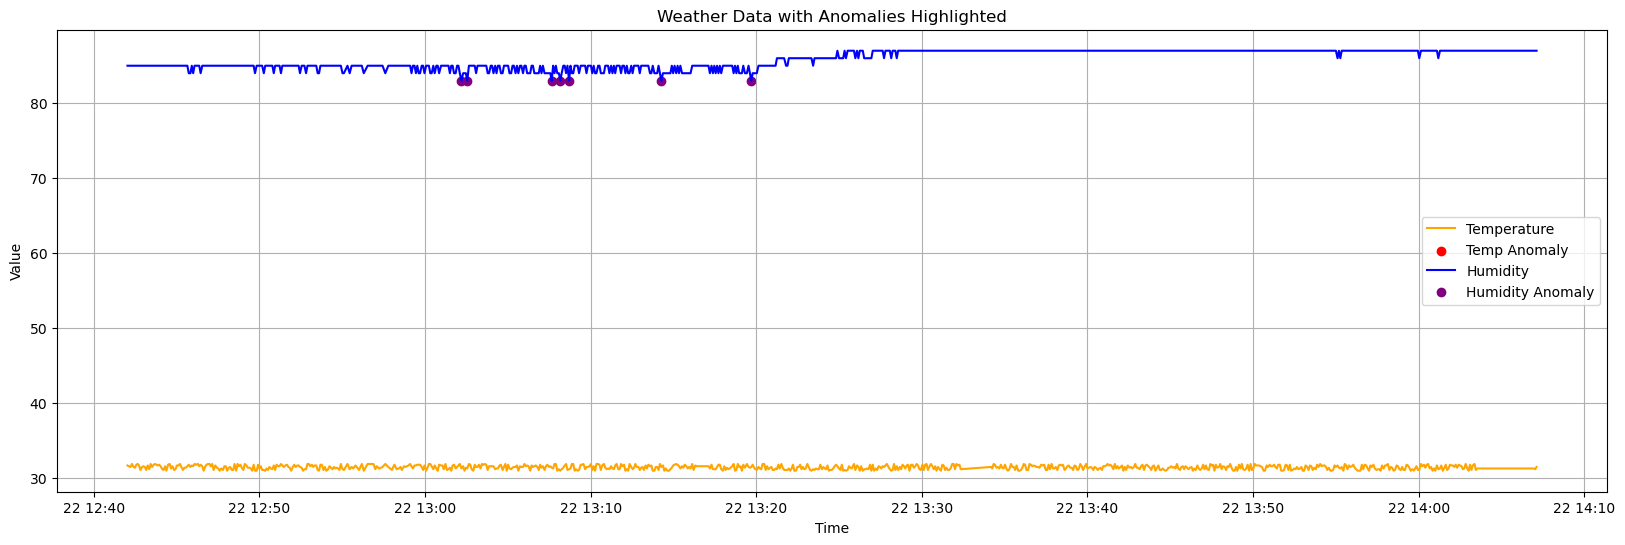

In [131]:
plt.figure(figsize=(20,6))

plt.plot(df["timestamp"], df["temperature"], label="Temperature", color="orange")
plt.scatter(df["timestamp"][df["temp_anomaly"]], df["temperature"][df["temp_anomaly"]], color="red", label="Temp Anomaly")

# Plot humidity
plt.plot(df["timestamp"], df["humidity"], label="Humidity", color="blue")
plt.scatter(df["timestamp"][df["humidity_anomaly"]], df["humidity"][df["humidity_anomaly"]], color="purple", label="Humidity Anomaly")

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Weather Data with Anomalies Highlighted")
plt.legend()
plt.grid(True)
plt.show()


<Axes: >

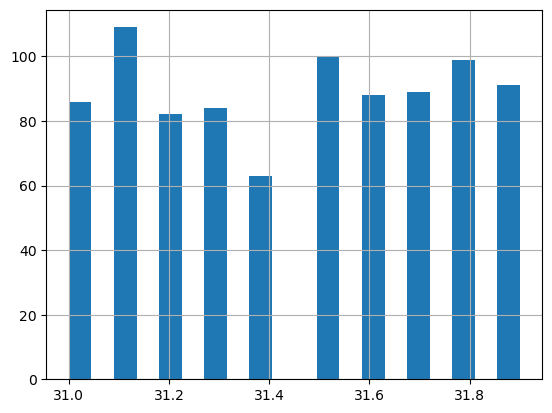

In [132]:
df["temperature"].hist(bins=20)
